In [106]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np

sns.set_style('darkgrid')

In [107]:
steam_games = pd.read_parquet(r"C:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos Individuales\Machine Learning Operations\Datasets\steam_games.parquet")

steam_games.head()

,publisher,genres,app_name,title,release_date,tags,specs,price,id,developer
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",0.00,643980,Secret Level SRL
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",0.00,670290,Poolians.com
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",[Single-player],0.99,767400,彼岸领域
4,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...","[Single-player, Steam Achievements]",3.99,772540,Trickjump Games Ltd


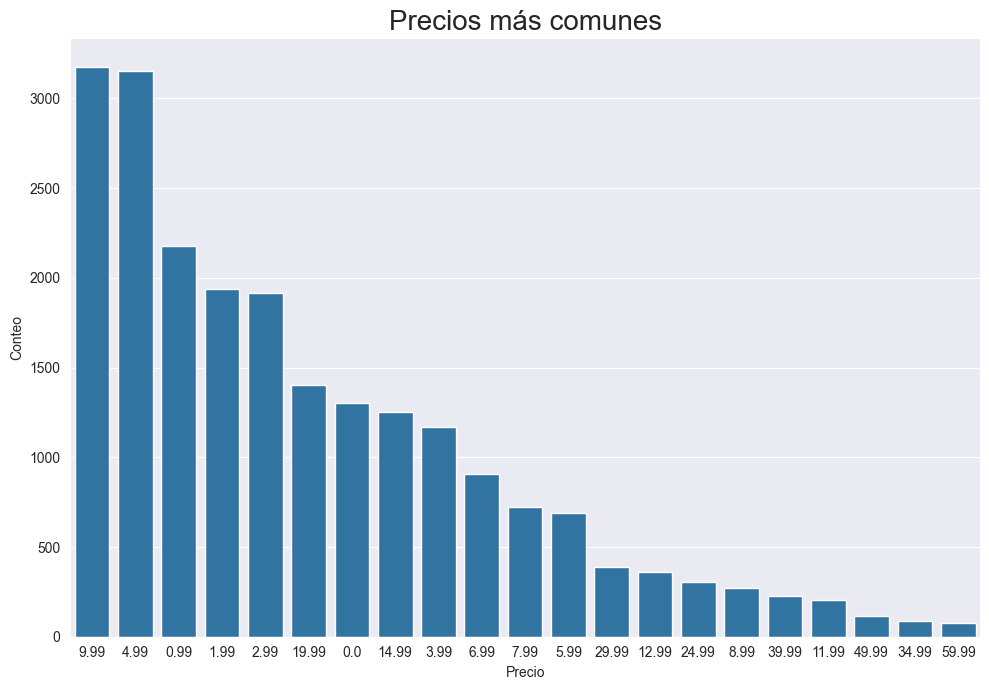

In [108]:
price = steam_games['price']

plt.figure(figsize=(10,7))
plt.title("Precios más comunes",fontsize=20)
plt.ylabel("Conteo")
plt.xlabel("Precio")

sns.countplot(data=steam_games, x='price',order=price.value_counts().index[:21], )

plt.tight_layout()
plt.show()

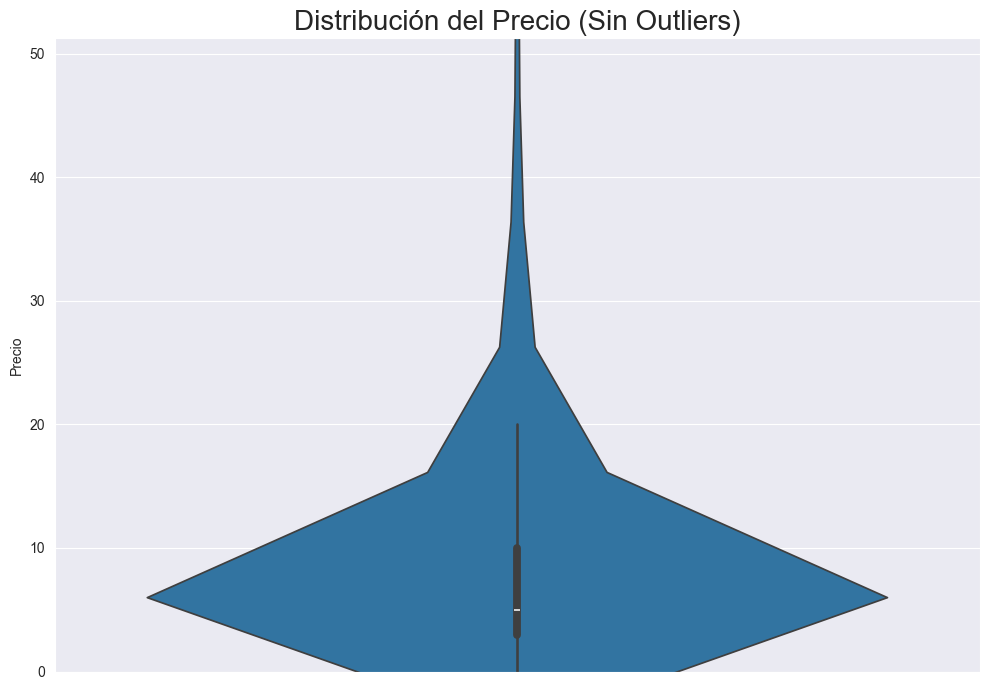

In [126]:
media = np.median(steam_games['price'].sort_values())

plt.figure(figsize=(10,7))

sns.violinplot(data=price)

plt.title("Distribución del Precio (Sin Outliers)",fontsize=20)
plt.ylabel("Precio")
plt.ylim(0,media+(3*np.std(price)))
plt.tight_layout()
plt.show()

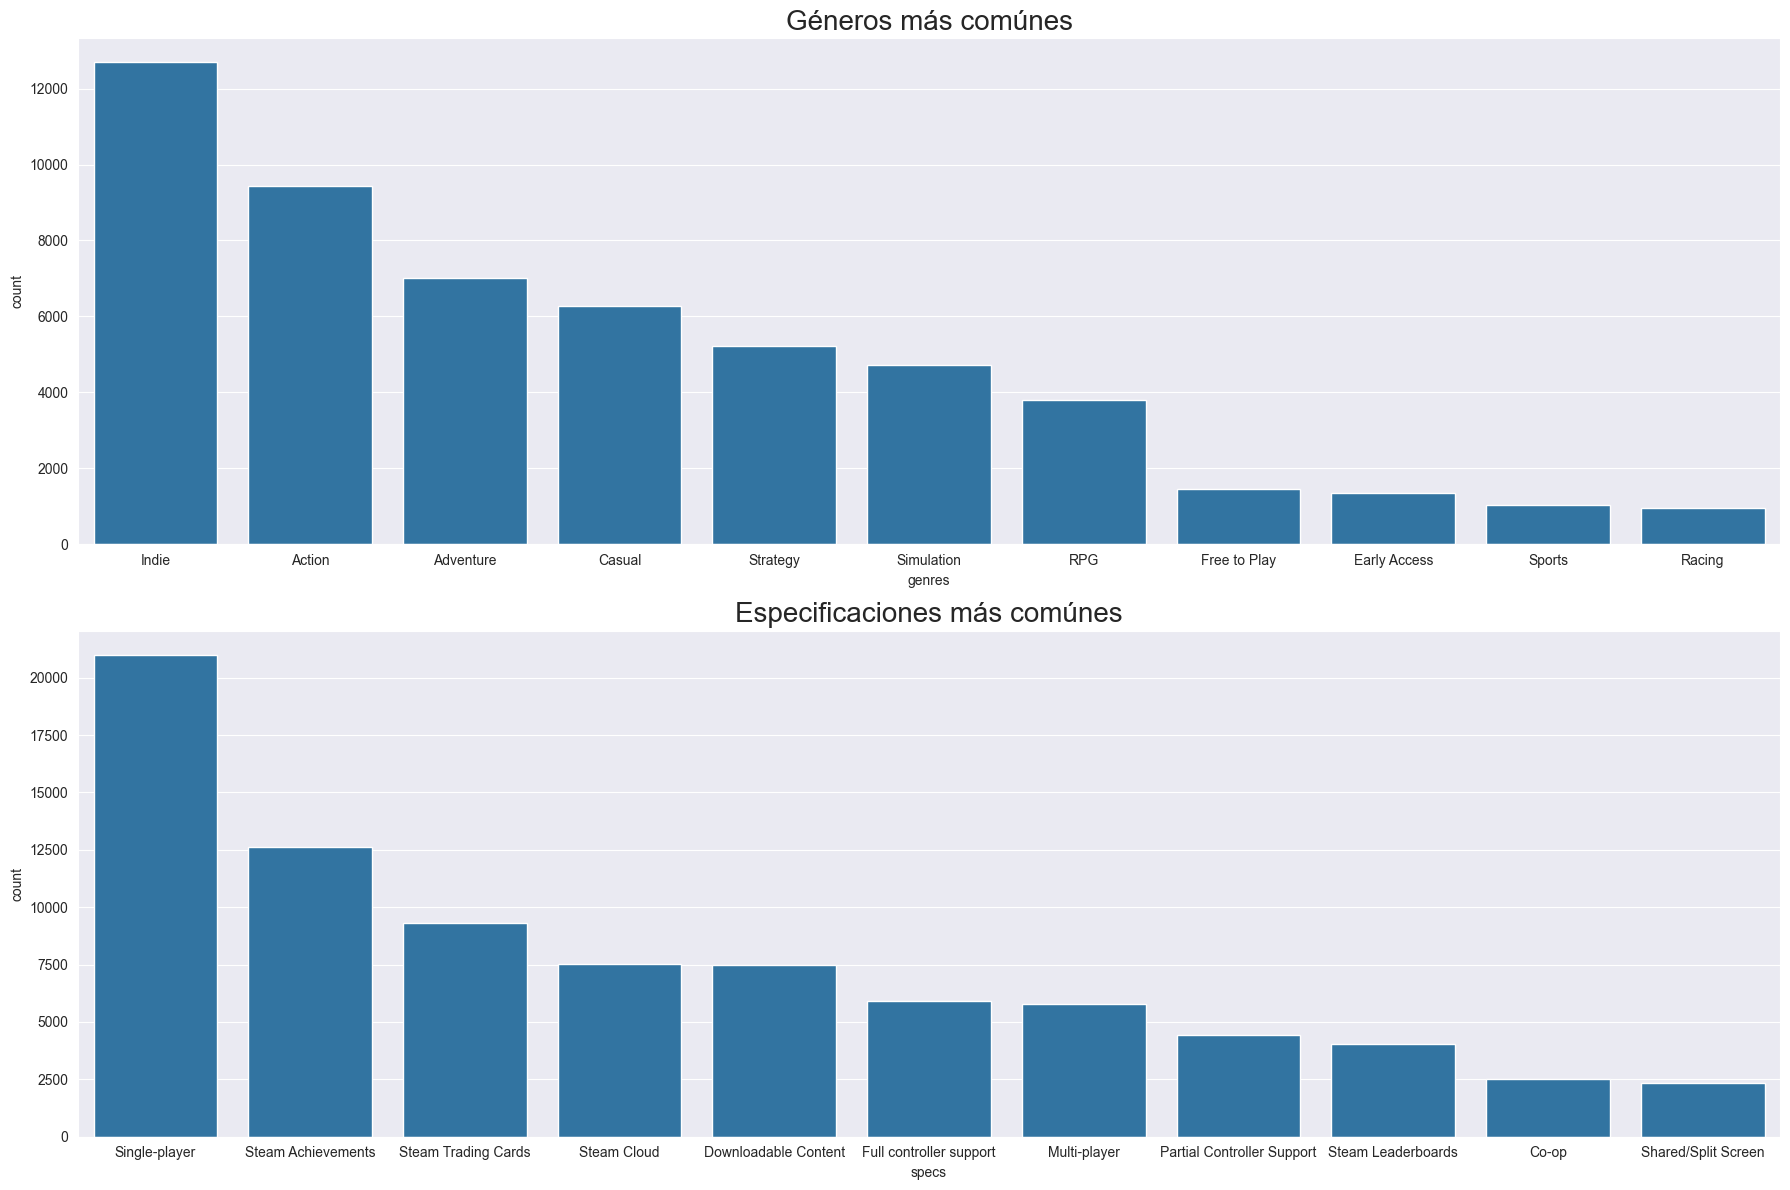

In [124]:
genres = steam_games['genres'].explode().reset_index(drop=True)
genres_count = genres.value_counts().index[:11]

specs = steam_games['specs'].explode().reset_index(drop=True)
specs_count = specs.value_counts().index[:11]

fig, (ax1,ax2) = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(18)

sns.countplot(x=genres,order=genres_count,ax=ax1)
ax1.set_title("Géneros más comúnes",fontsize=20)

sns.countplot(x=specs,order=specs_count,ax=ax2)
ax2.set_title("Especificaciones más comúnes",fontsize=20)
plt.tight_layout()
plt.show()